## Abstract

In this paper we applied the RICE and ICE frameworks to prioritize hypotheses. Using the example we saw how the key metrics of efforts and reach affect the ranking of hypotheses

We performed an analysis of the A/B Test. 

As a result of the analysis we found that the conversion of Group B shows a statistically significant difference and can be considered to increase the conversion rate in the future. 

There were no statistically significant changes concerning the revenue and the average check. The outlier that occurred in the middle of the month creates the impression that Group B shows better results, but filtering outliers and re-testing the cleaned data confirms the opposite. 



# Hypothesis Prioretization and A/B Testing

# Workflow:

- Introduction
- Hypothesis testing:
    - Load, Explore, and Process the Data
    - ICE Framework
    - RICE framework
    - Evaluate the conclusions
    
- A/B Test Analysis
    - Load the data, examine and process it, and let's go:
    
- Plot cumulative revenue by group. Make conclusions and assumptions.
- Plot the cumulative average check by group. Make inferences and assumptions.
- Plot the relative change in the cumulative average check of group B to group A. Make inferences and assumptions.
- Plot the cumulative conversion rate by group. Make conclusions and assumptions.
- Plot the relative change in cumulative group B to group A conversion. Make conclusions and assumptions.
- Construct a scatter plot of the number of orders by user. Make conclusions and assumptions.
- Calculate the 95th and 99th percentiles of the number of orders per user. Select a boundary to identify abnormal users.
- Construct a dot plot of order values. Make conclusions and assumptions.
- Calculate the 95th and 99th percentiles of order values. Select a boundary for determining abnormal orders.
- Calculate the statistical significance of differences in conversion between groups on the raw data. Make conclusions and assumptions.
- Calculate the statistical significance of differences in average order receipt between groups on the raw data. Make inferences and assumptions.
- Calculate the statistical significance of differences in conversion between groups on the "cleaned" data. Make inferences and assumptions.
- Calculate the statistical significance of differences in average order check between groups on the "cleaned" data. Make conclusions and - assumptions.
- Make a decision on the test results and explain it. Decision options: 1. Stop the test, record a win for one of the groups. 2. Stop the test, record no difference between the groups. 3. Continue the test.

Data for the first part

Hypothesis.csv: 

- Hypothesis - a brief description of the hypothesis;
- Reach - coverage of users on a 10-point scale;
- Impact - impact on users on a 10-point scale;
- Confidence - confidence in the hypothesis on a 10-point scale;
- Efforts - the cost of resources to test the hypothesis on a 10-point scale. The higher the Efforts value, the more expensive the hypothesis testing is.

Data for the second part

Orders.csv: 

- transactionId - order ID;
- visitorId - identifier of the user who made the order;
- date - date when the order was placed;
- revenue - revenue of the order;
- group - the A/B test group the order is in.

Visits.csv:

- date - date;
- group - A/B-test group;
- visitors - number of users on the specified date in the specified A/B-test group


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
import datetime as dt
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

warnings.filterwarnings('ignore')

pd.options.display.max_colwidth = 150


## Hypothesis Prioretization

### Data loading, examination and processing

In [2]:
tests = pd.read_csv('hypothesis.csv')
tests.columns = tests.columns.str.lower()
display(tests)


,hypothesis,reach,impact,confidence,efforts
0,"Add two new channels to engage traffic, which will attract 30% more users",3,10,8,6
1,"Launch your own delivery service, which will reduce the delivery time of orders",2,5,4,10
2,Add recommendation blocks of products to the website of the online store to increase the conversion rate and the average order receipt,8,3,7,3
3,"Change the structure of categories, which will increase conversion, because users will find the right product faster",8,3,3,8
4,Change the background color of the home page to increase user engagement,3,1,1,1
5,"Add a page of customer reviews of the store, which will increase the number of orders",3,2,2,3
6,Show banners with current promotions and sales on the home page to increase conversion rates,5,3,8,3
7,Add a subscription form to all the main pages to gather a customer base for email newsletters,10,7,8,5
8,Run a promotion that gives you a discount on your birthday,1,9,9,5


### Framework ICE

In [3]:
tests['ice'] = (tests['impact'] * tests['confidence'] / tests['efforts']).astype(int)

display(tests.sort_values(by='ice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice
8,Run a promotion that gives you a discount on your birthday,1,9,9,5,16
0,"Add two new channels to engage traffic, which will attract 30% more users",3,10,8,6,13
7,Add a subscription form to all the main pages to gather a customer base for email newsletters,10,7,8,5,11
6,Show banners with current promotions and sales on the home page to increase conversion rates,5,3,8,3,8
2,Add recommendation blocks of products to the website of the online store to increase the conversion rate and the average order receipt,8,3,7,3,7
1,"Launch your own delivery service, which will reduce the delivery time of orders",2,5,4,10,2
3,"Change the structure of categories, which will increase conversion, because users will find the right product faster",8,3,3,8,1
4,Change the background color of the home page to increase user engagement,3,1,1,1,1
5,"Add a page of customer reviews of the store, which will increase the number of orders",3,2,2,3,1


### Framework RICE

In [4]:
tests['rice'] = (tests['reach'] * tests['impact'] * tests['confidence'] / tests['efforts']).astype(int)


display(tests[['hypothesis','ice','rice']].sort_values(by='rice', ascending=False).style.set_caption('Colormaps, with a caption.')\
    .background_gradient(cmap=cm))

,hypothesis,ice,rice
7,Add a subscription form to all the main pages to gather a customer base for email newsletters,11,112
2,Add recommendation blocks of products to the website of the online store to increase the conversion rate and the average order receipt,7,56
0,"Add two new channels to engage traffic, which will attract 30% more users",13,40
6,Show banners with current promotions and sales on the home page to increase conversion rates,8,40
8,Run a promotion that gives you a discount on your birthday,16,16
3,"Change the structure of categories, which will increase conversion, because users will find the right product faster",1,9
1,"Launch your own delivery service, which will reduce the delivery time of orders",2,4
5,"Add a page of customer reviews of the store, which will increase the number of orders",1,4
4,Change the background color of the home page to increase user engagement,1,3


### Evaluation and comparison of results of ICE and RICE frameworks

The peculiarities of the ICE framework allowed us to consolidate initially unpromising hypotheses, which create a small user benefit compared to the complexity of development and implementation of these ideas. As a result, we can see that the positions that ranked last in ICE remain at the bottom, despite the addition of the REACH indicator. 

In analyzing the leaders of the framework ICE and comparing them with RICE, it is noticeable that the effective ideas will not always be the best choice. A prime example is the birthday campaign idea. The user coverage when testing this hypothesis is minimal. Despite the apparent feasibility of this idea, the effect on business will eventually be negligible and you can leave it for a while. 

From here the main advantage of RICE is noticeable: the coverage of more users and the maximum impact on the business as a whole. The best hypothesis to test is the "energy efficient" hypothesis with maximum coverage. 




    


    
 Analyzing the results, I would recommend hypothesis number 2. The recommendation system. If the e-mail newsletter is really as effective as shown in the table, without conditionally starting with hypothesis number 7. But from my own experience, subscription mailing only works when the client really wants to get the latest information. If you mindlessly subscribe, you don't even notice such emails and the effect on business is limited.
    
I would start with recommendation blocks for related products and banners for promotions. Less cost, greater reach, proven effectiveness. 


## A/B Test

Let's imagine that we processed A/B  test and receive following data: 


### Uploading and processing datasets

In [5]:
orders = pd.read_csv('orders.csv')
display(orders.head(5))
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info()


print('')
visitors = pd.read_csv('visitors.csv')
display(visitors.head(5))
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB



,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [6]:
#checking for visitorsId which were sorted in both groups
grouping_error = orders.groupby('visitorId', as_index=False).agg({'group':'count', 'group':'nunique'}).query('group > 1')
grouping_error_ids = list(grouping_error['visitorId'])
print('Number of visitors who are in both test groups at the same time:', len(grouping_error_ids))

display(orders.query('visitorId  in @grouping_error_ids').sort_values('visitorId').head(20))



orders = orders.query('visitorId not in @grouping_error_ids')
print('Number of orders without double grouping:',orders.shape[0])
orders.info()


Number of visitors who are in both test groups at the same time: 58


,transactionId,visitorId,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
71,3679129301,8300375,2019-08-01,10510,B
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
26,2223239646,199603092,2019-08-15,3488,A
134,62794304,199603092,2019-08-22,6976,A
1102,1941707234,199603092,2019-08-12,6438,A
1009,2670069237,232979603,2019-08-31,2640,B
1013,83566152,232979603,2019-08-31,60,A
590,3702128013,237748145,2019-08-20,1290,A


Number of orders without double grouping: 1016
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [7]:
#check if there are duplicates:
display(orders[orders.duplicated() == True])
display(visitors[visitors.duplicated() == True])


#create daily pivot with multiindex day,group 
#and values of revenue sum number of transactions and visitors:

display(orders.pivot_table(index=['date','group'], values=['transactionId','visitorId','revenue'], aggfunc = {'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}))



,transactionId,visitorId,date,revenue,group


,date,group,visitors


revenue  transactionId  visitorId
date       group                                   
2019-08-01 A       142779             23         19
           B        59758             17         17
2019-08-02 A        91602             19         18
           B       162043             23         22
2019-08-03 A       112473             24         24
...                   ...            ...        ...
2019-08-29 B       106100             15         15
2019-08-30 A        78180              9          8
           B       209223             21         21
2019-08-31 A        53243              8          8
           B       113139             17         17

[62 rows x 3 columns]

In [8]:
# create to datarframes by groups
group_a = orders.query('group == "A"')['visitorId']
group_b = orders.query('group == "B"')['visitorId']

for i in group_a:
    if i in group_b:
        print(i)
        
print('Orders of group A:', len(orders[orders['group'] == "A"]))
print('Orders of group B:', len(orders[orders['group'] == "B"]))

print('')
display(visitors.pivot_table(index='group', values='visitors', aggfunc='sum'))

Orders of group A: 468
Orders of group B: 548



,visitors
group,
A,18736
B,18916


<div class="alert alert-block alert-info">
    

The data we are investigating from August 1, 2019 to August 31, 2019. Together 62 lines in the date network (31 days per 2 groups). After scrubbing out the misallocated users, 1,016 transactions remain (468-A / 548-B). The difference in the number of visits of the two groups is in the range of 1 percent. 
</div>

### Plot the cumulative revenue by group

In [9]:

datesGroups = orders[['date','group']].drop_duplicates()

ordersAgg = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

ordersAgg.columns = ['date', 'group', 'orders', 'buyers','revenue']

visitorsAgg = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAgg.merge(visitorsAgg, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.tail())


,date,group,orders,buyers,revenue,visitors
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736
61,2019-08-31,B,548,528,5068972,18916


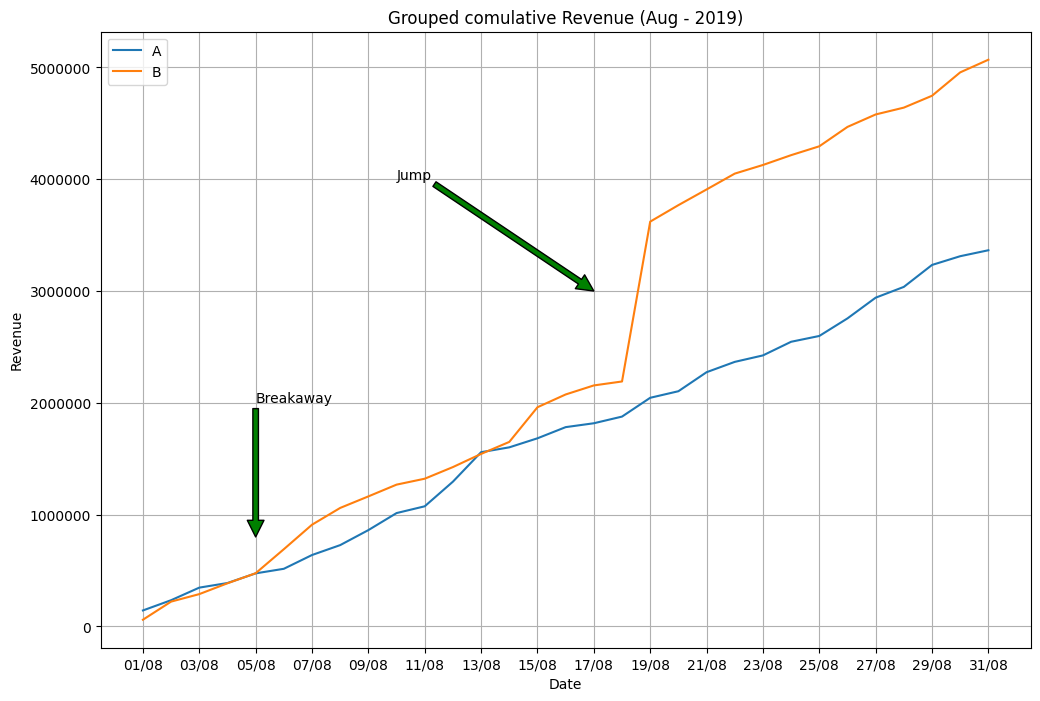

In [10]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


fig, ax = plt.subplots(figsize=(12, 8))
plt.grid()

ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


jump_date_1 = mdates.datestr2num('2019-08-17')
jump_date_2 = mdates.datestr2num('2019-08-10')

plt.annotate('Jump', xy=(jump_date_1, 3000000), xytext=(jump_date_2, 4000000),
            arrowprops=dict(facecolor='g'))

breakaway_date_1 = mdates.datestr2num('2019-08-05')
breakaway_date_2 = mdates.datestr2num('2019-08-05')

plt.annotate('Breakaway', xy=(breakaway_date_1, 800000), xytext=(breakaway_date_2, 2000000),
            arrowprops=dict(facecolor='g')) 


ax.set(xlabel="Date",
       ylabel="Revenue",
       title="Grouped comulative Revenue (Aug - 2019)")

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))

# Define the date format
date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))


plt.legend() 
plt.show()

<div class="alert alert-block alert-info">
The revenue of both groups grows evenly. 
In the middle of the month group B is fixed as a leader
Also, the jump in Group B revenue indicates the emergence of a large outlier. 

### Cumulative average bill chart by group


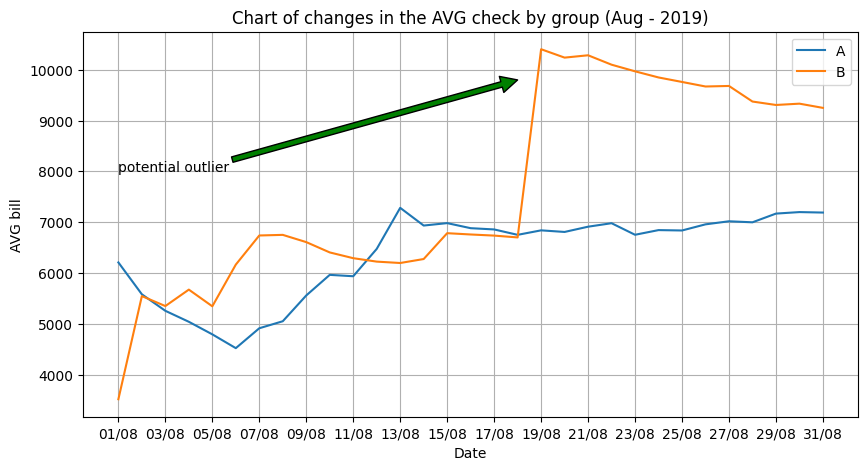

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.grid()

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

outlier_date_1= mdates.datestr2num('2019-08-18')
outlier_date_2= mdates.datestr2num('2019-08-01')

plt.annotate('potential outlier', xy=(outlier_date_1, 9800), xytext=(outlier_date_2, 8000),
            arrowprops=dict(facecolor='g'))

ax.set(xlabel="Date",
       ylabel="AVG bill",
       title="Chart of changes in the AVG check by group (Aug - 2019)")

# Define the date format
date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

plt.legend() 
plt.show()

<div class="alert alert-block alert-info">
Group B's output is so high that it increased the average check by 50%. 

Group A locked in around 7k. 
Group B Adjusted after the ejection. 

### Сhart of the relative change in the cumulative average check of group B to group A. 

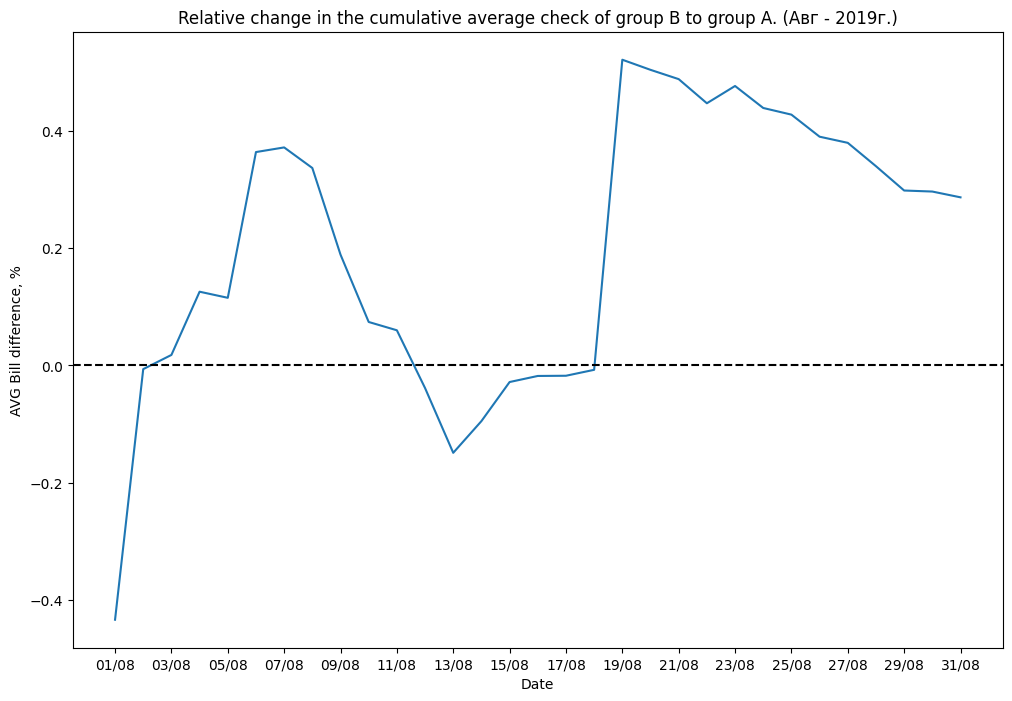

In [12]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

ax.set(xlabel="Date",
       ylabel="AVG Bill difference, %",
       title="Relative change in the cumulative average check of group B to group A. (Авг - 2019г.)")

# Define the date format
date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

 
plt.show()



<div class="alert alert-block alert-info">
As I indicated above, a correction followed the outliner. It's not clear if the 30% relative difference will hold for a long time, or if it will continue to correct. Let's see after the filtering 

### Cumulative conversion chart by group

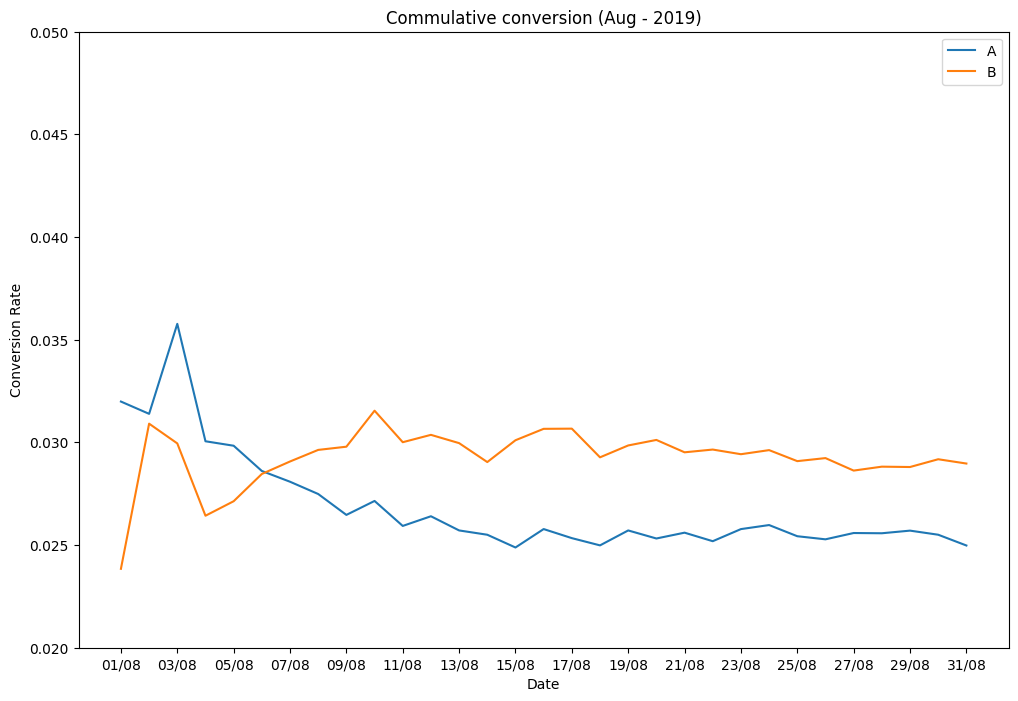

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))


cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()



ax.set(xlabel="Date",
       ylabel="Conversion Rate",
       title="Commulative conversion (Aug - 2019)")

# Define the date format
date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)

plt.ylim(top=0.05)
plt.ylim(bottom=0.02)


# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

 
plt.show()



<div class="alert alert-block alert-info">
Group conversion has fixed after 2 weeks of testing

### Chart of the relative change in the cumulative conversion of group B to group A.


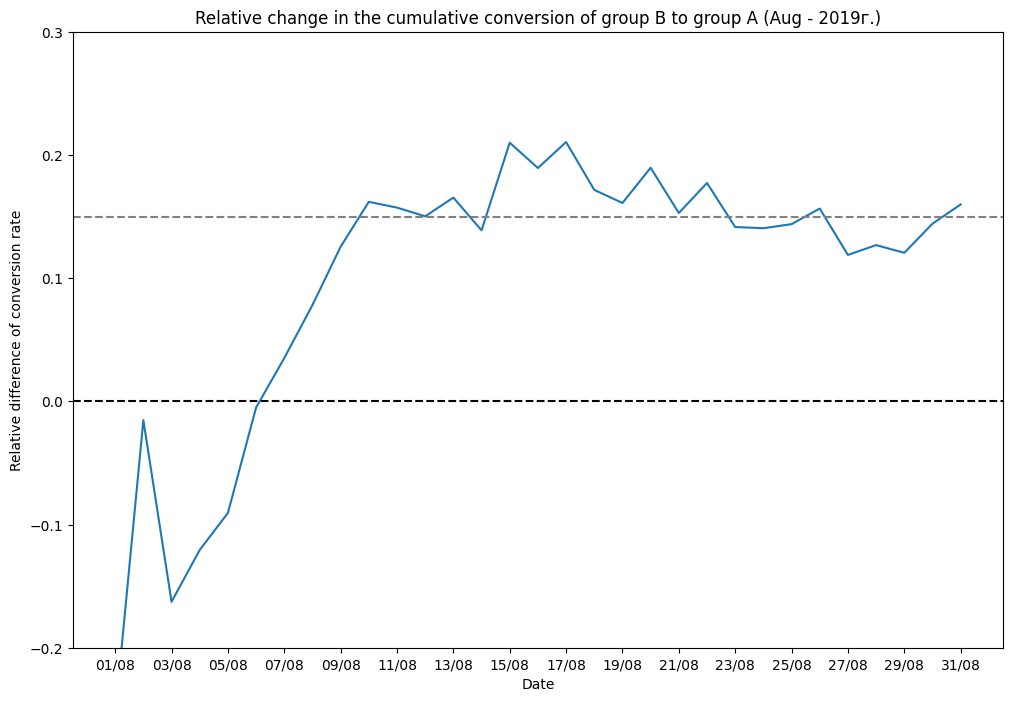

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

ax.set(xlabel="Date",
       ylabel="Relative difference of conversion rate",
       title="Relative change in the cumulative conversion of group B to group A (Aug - 2019г.)")

# Define the date format
date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)

plt.ylim(top=0.3)
plt.ylim(bottom=-0.2)


# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

 
plt.show()


<div class="alert alert-block alert-info">
Group B consistently shows a 15% higher conversion rate than Group A

### Charts of order values.

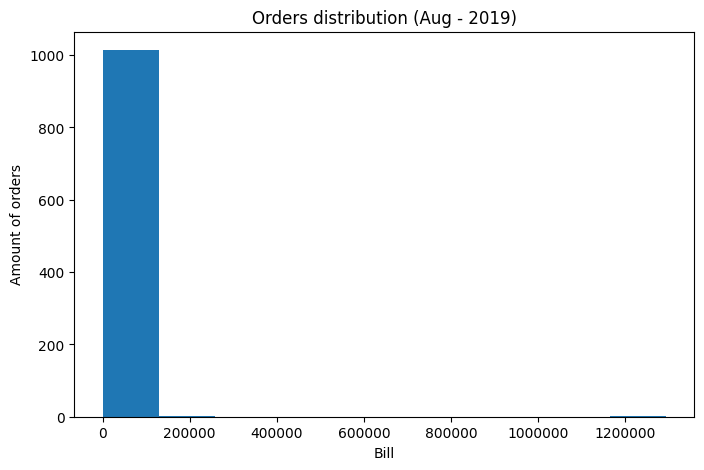

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.hist( orders['revenue']) 


ax.set(xlabel="Bill",
       ylabel="Amount of orders",
       title="Orders distribution (Aug - 2019)")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
plt.show()

8300.814960629921


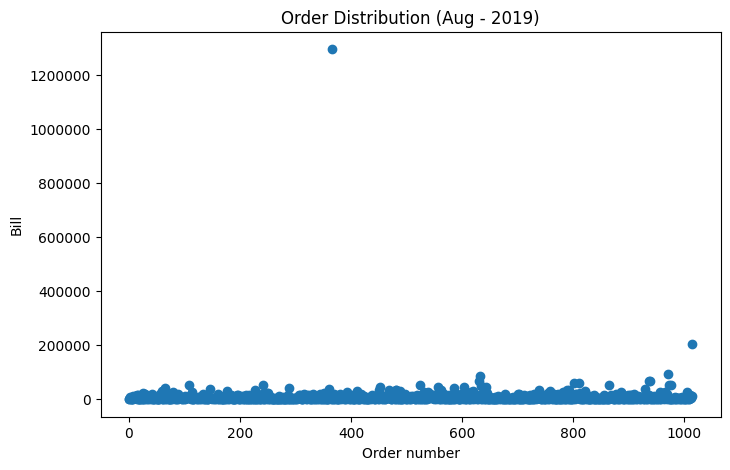

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
ax.set(xlabel="Order number",
       ylabel="Bill",
       title="Order Distribution (Aug - 2019)")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
print(orders['revenue'].mean())
plt.show()

<div class="alert alert-block alert-warning">
Huge outlier in revenue! order over 1 million with an average of 8300

### Count the 95th and 99th percentiles of orders per user. Select a boundary to identify abnormal users.

In [17]:
a = np.percentile(orders['revenue'], [80, 90, 95, 97.5, 99])

print(a)    


[ 9990. 17990. 26785. 37400. 53904.]


<div class="alert alert-block alert-info">
95 percentile - 26785


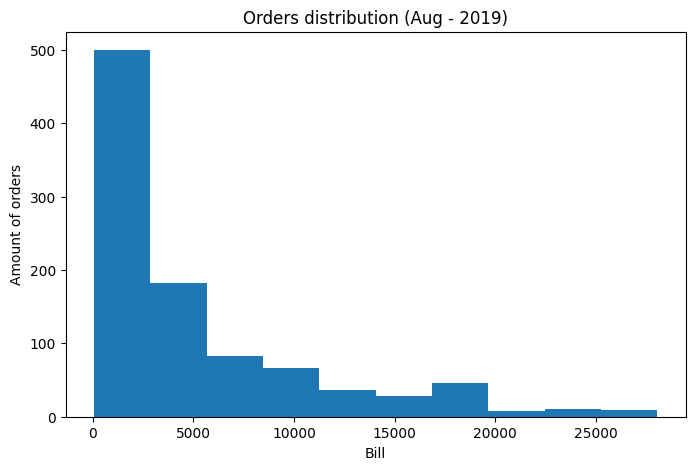

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.hist( orders.query('revenue < 28085')['revenue']) 


ax.set(xlabel="Bill",
       ylabel="Amount of orders",
       title="Orders distribution (Aug - 2019)")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
plt.show()

5035.3637305699485


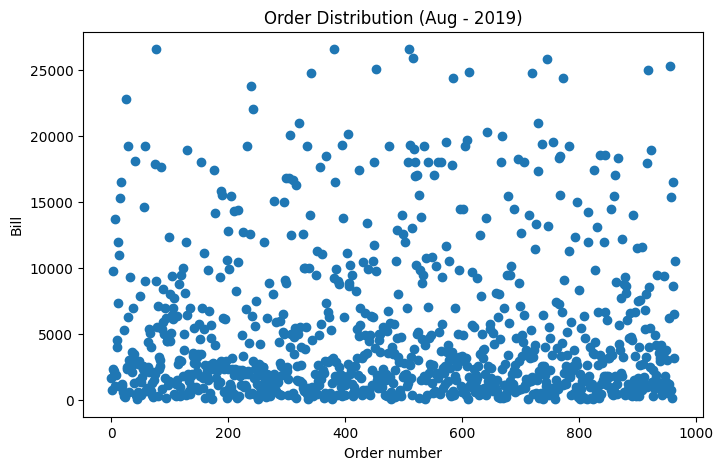

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))

x_values = pd.Series(range(0,len(orders.query('revenue < 26785')['revenue'])))
plt.scatter(x_values, orders.query('revenue < 26785')['revenue']) 
ax.set(xlabel="Order number",
       ylabel="Bill",
       title="Order Distribution (Aug - 2019)")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
print(orders.query('revenue < 26785')['revenue'].mean())
plt.show()

### Scatter chart of the number of orders by user

In [20]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 



         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


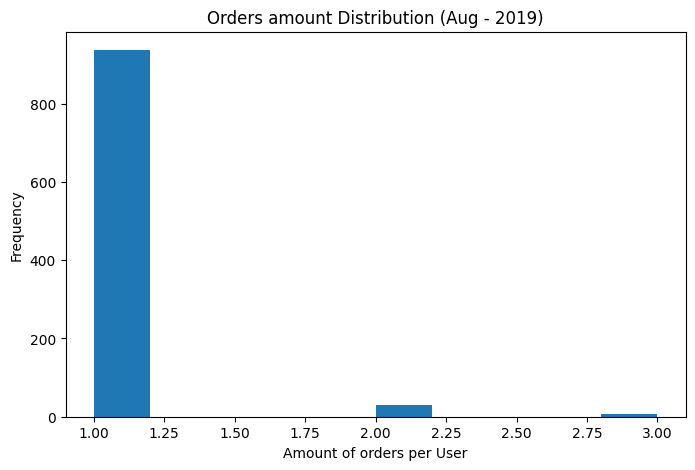

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.hist(ordersByUsers['orders']) 

ax.set(xlabel="Amount of orders per User",
       ylabel="Frequency",
       title="Orders amount Distribution (Aug - 2019)")

plt.show()

[1. 1. 2.]


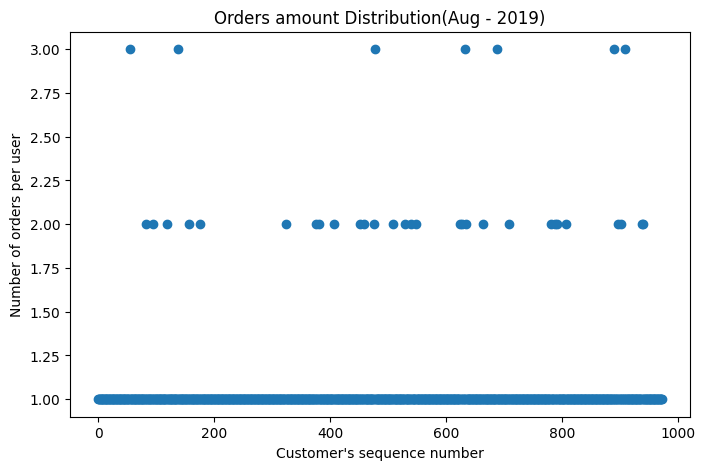

In [22]:

fig, ax = plt.subplots(figsize=(8, 5))

x_values = pd.Series(range(0,len(ordersByUsers)))

print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 
plt.scatter(x_values, ordersByUsers['orders']) 

ax.set(xlabel = "Customer's sequence number",
       ylabel="Number of orders per user",
       title="Orders amount Distribution(Aug - 2019)")

plt.show()

<div class="alert alert-block alert-info">
95 percentile - 1 order

<div class="alert alert-block alert-success">

Hypothesis Formulation.
    
We will conduct two group. Each will be conducted on raw and filtered data. We will check the conversion rate and the average bill.
    
- Hypotheses of the first test: 
    
Zero: The conversions of the two groups are equal  ///  
First: The conversions of the two groups are different (two-sided test)
    
- Hypotheses of the second test: 
    
Zero: The average check of the two groups is equal  ///  
First: The average check of the two groups is different(two-sided test)
    
Alpha level for tests is 5% 

</div>

### Calculate the statistical significance of the differences in conversion rate and average bill between the groups on the "raw" data. 


In [23]:
#transactionId	visitorId

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [24]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

display(ordersByUsersA)
display(ordersByUsersB)


,visitorId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1
...,...,...
440,4227830084,1
441,4237561104,1
442,4243832526,1
443,4259830713,1


,visitorId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1
...,...,...
523,4251115836,1
524,4258103007,1
525,4279090005,1
526,4281247801,1


<div class="alert alert-block alert-warning">
First test on conversion rate difference:

In [25]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 


In [26]:
print('P-value:')
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))
print('Relative conversion difference of Samples')
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))




P-value:
0.011
Relative conversion difference of Samples
0.160


<div class="alert alert-block alert-danger">
Results: 
    
P value level is less than Alpha level! We reject the null hypothesis, the differences in the samples are statistically significant! 
    
The difference in conversion is 16%. Hypothesis testing showed, the conversions are not equal. Group B conversion is statistically different.
    

    

<div class="alert alert-block alert-warning">
Second test on revenue difference:

In [27]:
print('P-value:')
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('Relative AVG bill difference:')
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value:
0.829
Relative AVG bill difference:
0.287


<div class="alert alert-block alert-danger">
Results: 

The ratio of the average check of the two groups, shows a difference of 29%. However, the p value is greater than the Alpha level. We cannot reject the Null hypothesis of equality of averages.


Let's look at the both test after filtering outliers.

### Calculate the statistical significance of differences in conversion between groups on the "cleaned" data. Make conclusions and assumptions.

In [28]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 
print(round(abnormalUsers.shape[0]/len(orders)*100,2), '% of dataset')

1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
Name: visitorId, dtype: int64
83
8.17 % of dataset


<div class="alert alert-block alert-info">
We filter 8% of the data. The normal level of filtering is 5 percent. Normally we need to know what exactly we are checking if the number of orders or the amount of the bills increases. Depending on the task you can move the boundaries of the filter. Nevertheless we accept 8% in our case.

In [29]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,) 

In [30]:
print('P-Value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered,  alternative = 'two-sided')[1]))
print('Relative conversion difference:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-Value: 0.012
Relative conversion difference: 0.181


<div class="alert alert-block alert-danger">
P value is less than the alpha threshold. The difference in conversions is statistically significant! Group B's conversion rate is 17 percent higher and we need to apply this group's practices to improve conversions 



### Calculate the statistical significance of the differences in the average order receipt between the groups according to the "cleaned" data. 

In [31]:
print('P-Value:','{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],orders[
                np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
            ]['revenue'], alternative = 'two-sided')[1]))

print('Relative AVG receipt difference:'"{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',
            np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1)) 

P-Value: 0.851
Relative AVG receipt difference:-0.006


<div class="alert alert-block alert-danger">
After filtering the emission p value is greater than the alpha level. It is impossible to reject the hypothesis of the difference in the average check of the two samples.


Also the average check after filtering shows that the relative difference of groups A and B is almost equal. 

# Summary

1) After reviewing the list of suggested hypotheses, my recommendation is to focus on hypothesis tests number 2 and 6. Low costs with high coverage will help to quickly assess the workability of these hypotheses. 

2) After testing A/B it is concluded that the average check and profitability of group B remains unchanged. However, there is a noticeable increase in conversion as compared to the basic group A. I think the test can be completed. It is necessary to study why the conversion has increased and accept the fact that this idea does not affect the average receipt.

